# Problem

A business produces two products $X$ and $Y$. To make these two products he needs $3$ machines and a quantity of labor.

To produce $1$kg of $X$ we need:

 * $2$ hours on machine $1$
 * $1$ hour on machine $2$
 * $2$ hours on machine $3$
 * $1$ hour of labor 
   
To produce $1$kg of $Y$ we need:

 * $1$ hour on machine $1$
 * $2$ hours on machine $2$
 * $1$ hour of labor 
 
On the first and second machine there are a maximum of $140$ hours available. The last machine has $130$ hours available. There are a maximum of $90$ hours of labor.

The profit for $1$kg of $X$ is $\$30$, and for $1$kg of $Y$ it is $\$20$. The business wants to maximize their profits.

How many kg $X$ and $Y$ does he needs to make? Assuming that all produced products will be sold.

# Linear programming model

First we convert the linear programming problem into a linear programming model.

* Let $x$: quantity required to produce in kg for $X$.
* Let $y$: quantity required to product in kg for $Y$.
* max $30x + 20y$
* $2x+y \leq 140$
* $x+2y\leq 140$
* $2x \leq 130$
* $x + y \leq 90$

## Solving it graphically

To find the intersections we solve:

$$ S_1 = \begin{cases} x+y=90 \\ x+2y=140 \end{cases} $$

$$ S_2 = \begin{cases} 2x+y=140 \\ x+2y=140 \end{cases} $$

$$ S_3 = \begin{cases} x+2y=140 \\ 2x=130 \end{cases} $$

$$ S_4 = \begin{cases} x+y=90 \\ 2x+y=140 \end{cases} $$

In [299]:
S1 = solve(cbind(c(1,1),c(1,2)),c(90,140)) 
S2 = solve(cbind(c(2,1),c(1,2)),c(140,140))
S3 = solve(cbind(c(1,2),c(2,0)),c(140,130))
S4 = solve(cbind(c(1,2),c(1,1)),c(90,140))
s = cbind(S1,S2,S3,S4)
rownames(s) <- c('x', 'y')
s

,S1,S2,S3,S4
x,40,46.66667,65.0,50
y,50,46.66667,37.5,40


We calculate the profit for each of the points:

In [300]:
for (i in 1:4) {
    print(paste('X=', s[1,i], 'Y=', s[2,i], 'Profit=', 30*s[1,i]+20*s[2,i]))
}

[1] "X= 40 Y= 50 Profit= 2200"
[1] "X= 46.6666666666667 Y= 46.6666666666667 Profit= 2333.33333333333"
[1] "X= 65 Y= 37.5 Profit= 2700"
[1] "X= 50 Y= 40 Profit= 2300"


Only $S_1$ and $S_4$ are viable solutions. We create a function $d(x)$ through $S_4$ which is $(50, 40)$:

$$ 30x + 20y = 0 \iff y = -\frac{3}{2}x$$

Finally we plug-in the point $(50,40)$:

$$ y = -\frac{3}{2}(x-50)+40 $$

In [301]:
d <- function(x) -3/2*(x-50)+40

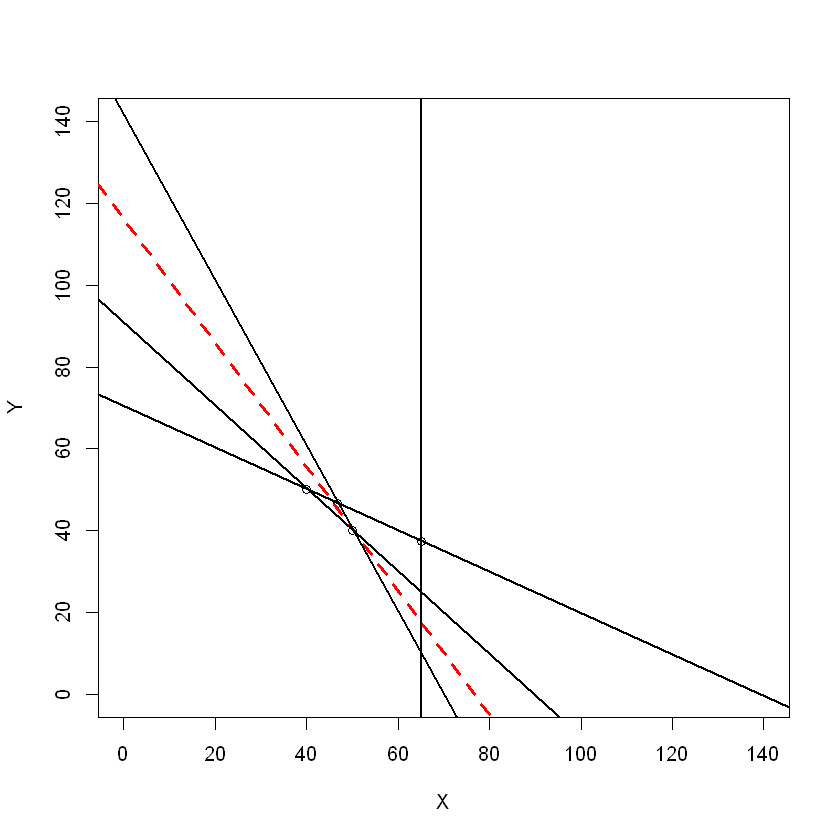

In [302]:
a = 0
b = 140
X = Y = a:b
plot(X,Y,col='white')
points(s[1,], s[2,])
c1 = line(a:b, sapply(a:b, d))
c2 = line(a:b, sapply(a:b, function(x) (140-2*x)))
c3 = line(a:b, sapply(a:b, function(x) (1/2*(140-x))))
c4 = line(a:b, sapply(a:b, function(x) (90-x)))
abline(c1, col='red', lwd=3, lty=2)
abline(c2, lwd=2)
abline(c3, lwd=2)
abline(c4, lwd=2)
abline(v=130/2, lwd=2)

## Solution

The solution is $50$ kg of $X$ and $40$ kg of $Y$ with a total profit of $\$2300$.

# Simplex method

Now we are going to find the solution with the simplex method.

In [303]:
d = c(1,0,0,0,0)
x = c(-30, 2,1,2,1)
y = c(-20,1,2,0,1)
s1 = c(0,1,0,0,0)
s2 = c(0,0,1,0,0)
s3 = c(0,0,0,1,0)
s4 = c(0,0,0,0,1)
RHS = c(0,140,140,130,90)
M = cbind(d,x,y,s1,s2,s3,s4,RHS)
rownames(M) = c('d','s1','s2','s3','s4')
M

,d,x,y,s1,s2,s3,s4,RHS
d,1,-30,-20,0,0,0,0,0
s1,0,2,1,1,0,0,0,140
s2,0,1,2,0,1,0,0,140
s3,0,2,0,0,0,1,0,130
s4,0,1,1,0,0,0,1,90


Solving for $X$:

In [304]:
M[1,] = M[1,] + 15*M[4,]
M[2,] = M[2,] - M[4,]
M[3,] = M[3,] - 1/2*M[4,]
M[5,] = M[5,] - 1/2*M[4,]
M[4,] = 1/2*M[4,]
rownames(M) = c('d','s1','s2','x','s4')

In [305]:
M

,d,x,y,s1,s2,s3,s4,RHS
d,1,0,-20,0,0,15.0,0,1950
s1,0,0,1,1,0,-1.0,0,10
s2,0,0,2,0,1,-0.5,0,75
x,0,1,0,0,0,0.5,0,65
s4,0,0,1,0,0,-0.5,1,25


Solving for $Y$:

In [306]:
M[1,] = M[1,] + 20*M[2,]
M[3,] = M[3,] - 2*M[2,]
M[5,] = M[5,] - M[2,]
rownames(M) = c('d','y','s2','x','s4')
M

,d,x,y,s1,s2,s3,s4,RHS
d,1,0,0,20,0,-5.0,0,2150
y,0,0,1,1,0,-1.0,0,10
s2,0,0,0,-2,1,1.5,0,55
x,0,1,0,0,0,0.5,0,65
s4,0,0,0,-1,0,0.5,1,15


Solving for $s_3$:

In [307]:
M[1,] = M[1,] + 10*M[5,]
M[2,] = M[2,] + 2*M[5,]
M[3,] = M[3,] - 3*M[5,]
M[4,] = M[4,] - M[5,]
M[5,] = 2*M[5,]
rownames(M) = c('d','y','s2','x','s3')
M

,d,x,y,s1,s2,s3,s4,RHS
d,1,0,0,10,0,0,10,2300
y,0,0,1,-1,0,0,2,40
s2,0,0,0,1,1,0,-3,10
x,0,1,0,1,0,0,-1,50
s3,0,0,0,-2,0,1,2,30


## Solution 

The total profit is $\$2300$. For maximum profit we need to produce $50$ kg of $X$, and $40$ kg of $Y$. With a remainder for $s_2=10$ and $s_3=30$.